# 📝 Exercise M4.03

Now, we tackle a more realistic classification problem instead of making a
synthetic dataset. We start by loading the Adult Census dataset with the
following snippet. For the moment we retain only the **numerical features**.

In [4]:
import pandas as pd
url = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/master/datasets/adult-census.csv"

adult_census = pd.read_csv(url)
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])
data

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30
...,...,...,...,...
48837,27,0,0,38
48838,40,0,0,40
48839,58,0,0,40
48840,22,0,0,20


We confirm that all the selected features are numerical.

Compute the generalization performance in terms of accuracy of a linear model
composed of a `StandardScaler` and a `LogisticRegression`. Use a 10-fold
cross-validation with `return_estimator=True` to be able to inspect the
trained estimators.

In [8]:
# Write your code here.

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

logistic_regression = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

cv_results = cross_validate(
    logistic_regression,
    data,
    target,
    cv=10,
    return_estimator = True,
    n_jobs = 2
)

test_score_lr = cv_results["test_score"]
test_score_lr

array([0.79856704, 0.79283521, 0.79668305, 0.80487305, 0.80036855,
       0.79914005, 0.79750205, 0.7993448 , 0.80528256, 0.80405405])

What is the most important feature seen by the logistic regression?

You can use a boxplot to compare the absolute values of the coefficients while
also visualizing the variability induced by the cross-validation resampling.

<Axes: >

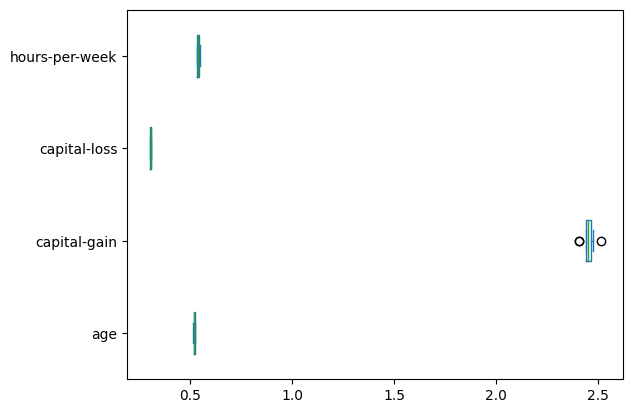

In [14]:
# Write your code here.
import matplotlib.pyplot as plt

coefs = [pipeline[-1].coef_[0] for pipeline in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=data.columns)

_, ax = plt.subplots()
coefs.abs().plot.box(vert = False, ax=ax)

Let's now work with **both numerical and categorical features**. You can
reload the Adult Census dataset with the following snippet:

In [16]:
url = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/master/datasets/adult-census.csv"

adult_census = pd.read_csv(url)
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

Create a predictive model where:
- The numerical data must be scaled.
- The categorical data must be one-hot encoded, set `min_frequency=0.01` to
  group categories concerning less than 1% of the total samples.
- The predictor is a `LogisticRegression`. You may need to increase the number
  of `max_iter`, which is 100 by default.

Use the same 10-fold cross-validation strategy with `return_estimator=True` as
above to evaluate this complex pipeline.

In [22]:
# Write your code here.
from sklearn.compose import make_column_selector 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_data = make_column_selector(dtype_exclude=object)(data)
categorical_data = make_column_selector(dtype_include=object)(data)

numerical_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", min_frequency=0.01) # to group categories that are less than 1% of the data

preprocessor = ColumnTransformer(
    [
        ("numerical_preprocessor", numerical_preprocessor, numerical_data),
        ("categorical_preprocessor", categorical_preprocessor, categorical_data)
    ]
)

model = make_pipeline(
    preprocessor,
    LogisticRegression(max_iter=500)
)

cv_results_complex_lr = cross_validate(
    model,
    data,
    target,
    cv=10,
    return_estimator = True,
    n_jobs = 2
)

test_score_complex_lr = cv_results_complex_lr["test_score"]
test_score_complex_lr

array([0.85281474, 0.85056295, 0.84971335, 0.8474611 , 0.84807535,
       0.84684685, 0.85565111, 0.8507371 , 0.85872236, 0.8515561 ])

By comparing the cross-validation test scores of both models fold-to-fold,
count the number of times the model using both numerical and categorical
features has a better test score than the model using only numerical features.

A model using both all features is better than a model using only numerical features for 10 CV iterations out of 10.


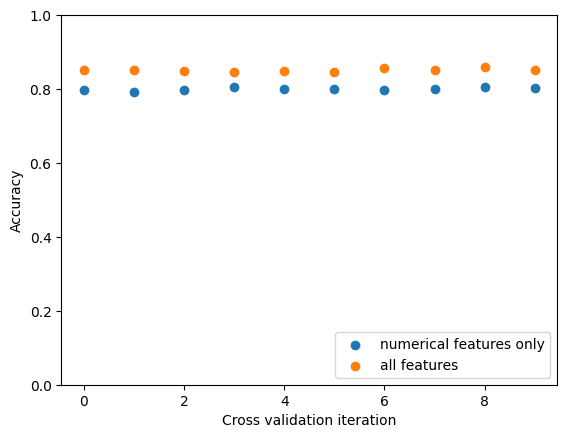

In [26]:
# Write your code here.

import numpy as np
import matplotlib.pyplot as plt

indices = np.arange(len(test_score_lr))
plt.scatter(
    indices, test_score_lr, label = "numerical features only"
)
plt.scatter(
    indices, test_score_complex_lr, label = "all features"
)

plt.ylim((0,1))
plt.xlabel("Cross validation iteration")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

print(
    "A model using both all features is better than a"
    " model using only numerical features for"
    f" {sum(test_score_complex_lr > test_score_lr)} CV iterations out of 10."
)

For the following questions, you can copy and paste the following snippet to
get the feature names from the column transformer here named `preprocessor`.

```python
preprocessor.fit(data)
feature_names = (
    preprocessor.named_transformers_["onehotencoder"].get_feature_names_out(
        categorical_columns
    )
).tolist()
feature_names += numerical_columns
feature_names
```

In [33]:
# Write your code here.

preprocessor.fit(data)
feature_names = (
    preprocessor.named_transformers_["categorical_preprocessor"].get_feature_names_out(
        categorical_data
    )
).tolist()
feature_names += numerical_data
feature_names

['workclass_ ?',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_infrequent_sklearn',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Prof-school',
 'education_ Some-college',
 'education_infrequent_sklearn',
 'marital-status_ Divorced',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'marital-status_infrequent_sklearn',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Ma

Notice that there are as many feature names as coefficients in the last step
of your predictive pipeline.

Which of the following pairs of features is most impacting the predictions of
the logistic regression classifier based on the absolute magnitude of its
coefficients?

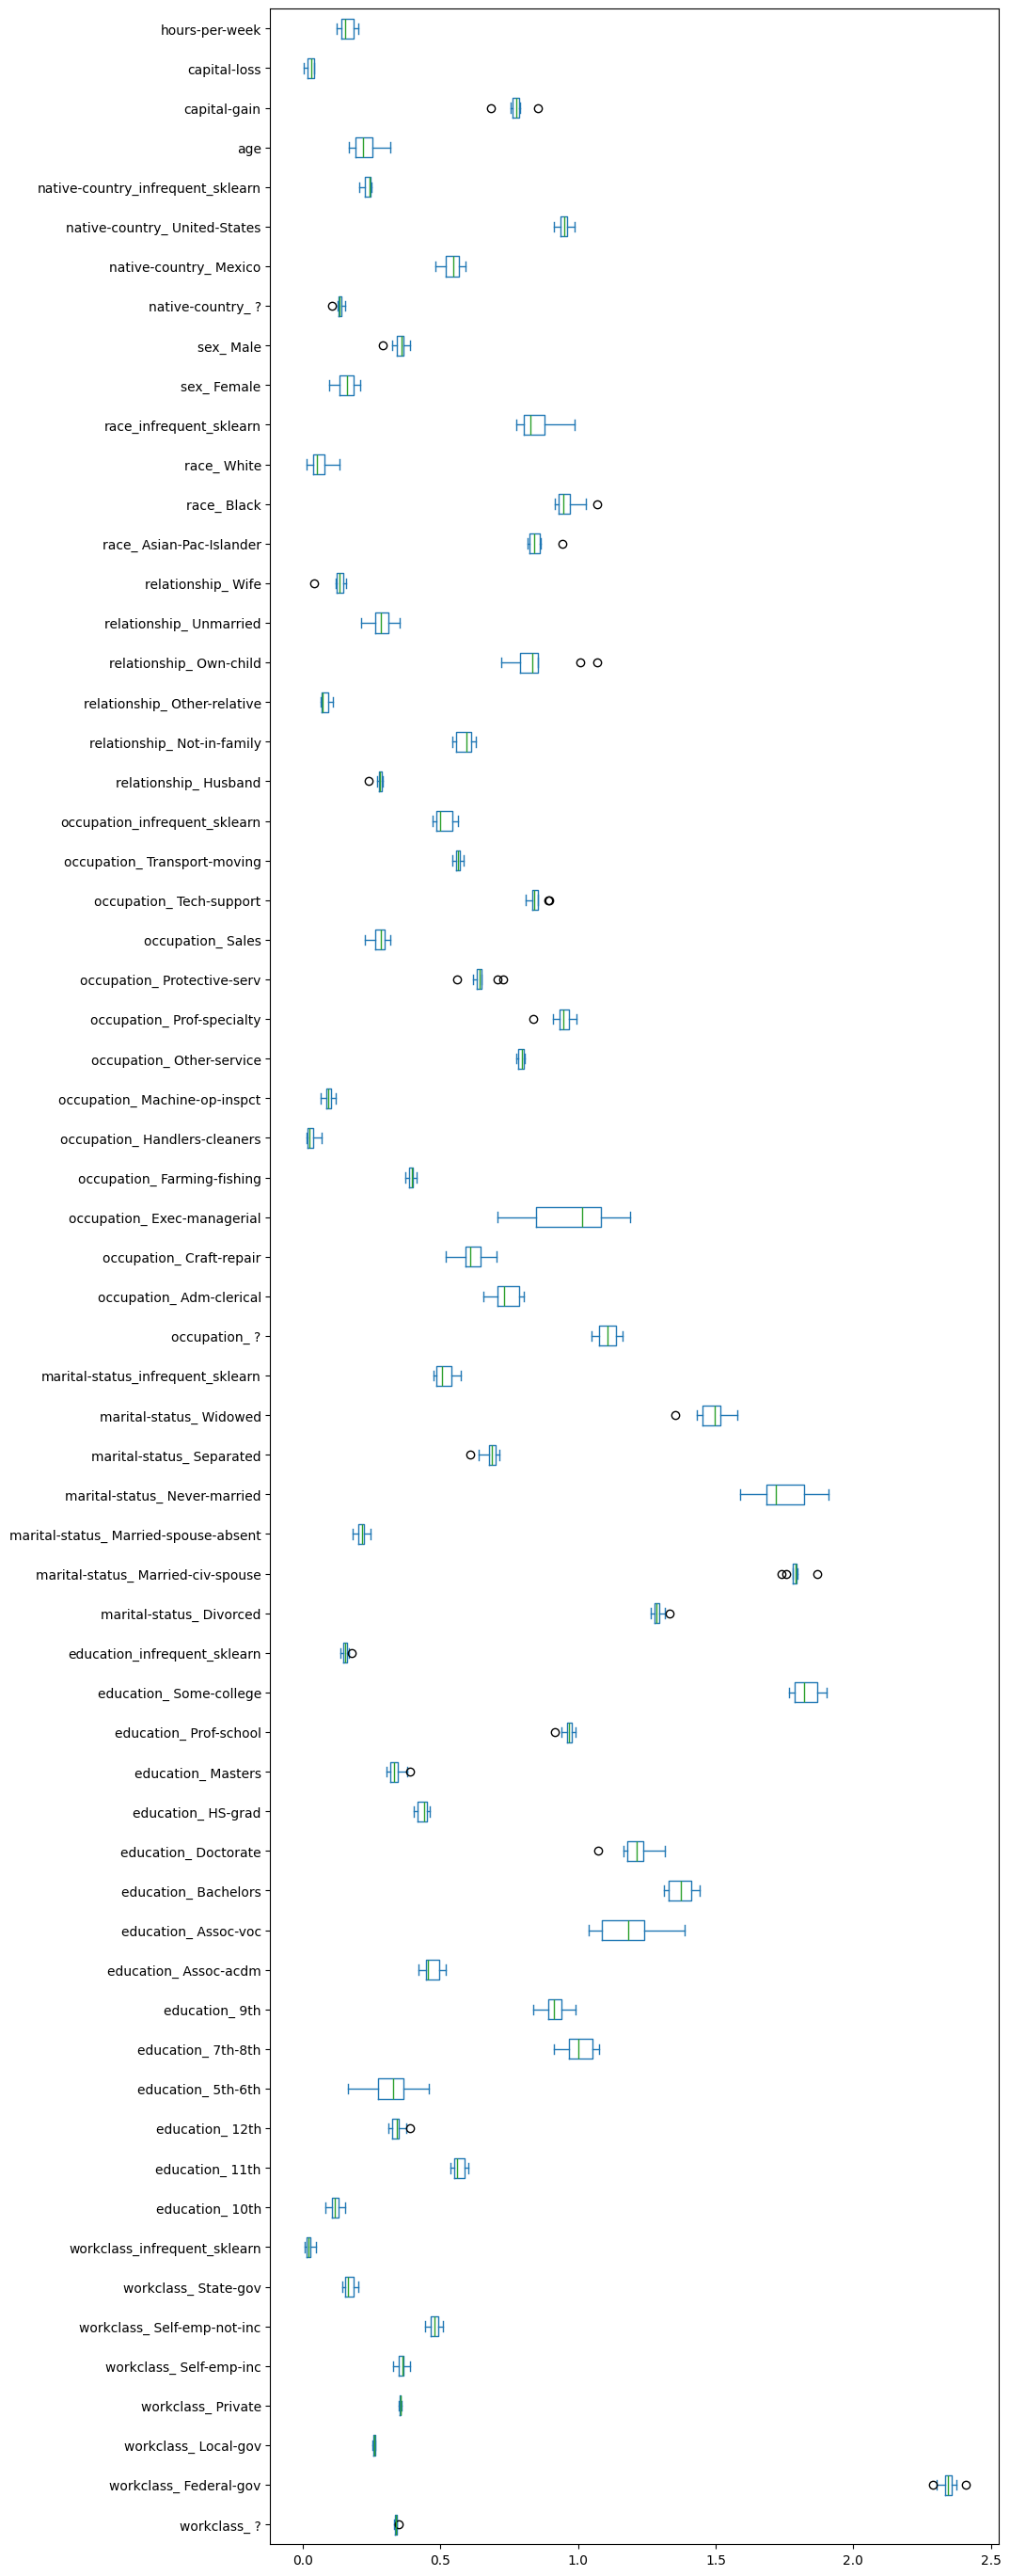

In [35]:
# Write your code here.

coefs = [pipeline[-1].coef_[0] for pipeline in cv_results_complex_lr["estimator"]]
coefs = pd.DataFrame(coefs, columns=feature_names)

_, ax = plt.subplots(figsize=(10, 35))
_ = coefs.abs().plot.box(vert = False, ax=ax)

Now create a similar pipeline consisting of the same preprocessor as above,
followed by a `PolynomialFeatures` and a logistic regression with `C=0.01`.
Set `degree=2` and `interaction_only=True` to the feature engineering step.
Remember not to include a "bias" feature to avoid introducing a redundancy
with the intercept of the subsequent logistic regression.

In [41]:
# Write your code here.
from sklearn.preprocessing import PolynomialFeatures

model_with_interaction = make_pipeline(
    preprocessor,
    PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False), # to avoid introducing a redundancy with the intercept
    LogisticRegression(C = 0.01, max_iter = 500)
)
model_with_interaction

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical_preprocessor',
                                                  StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('categorical_preprocessor',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                min_frequency=0.01),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('polynomialfeatures',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('logisticregression',
                 LogisticRegression(C=0.01, max_iter=500))])

By comparing the cross-validation test scores of both models fold-to-fold,
count the number of times the model using multiplicative interactions and both
numerical and categorical features has a better test score than the model
without interactions.

In [42]:
# Write your code here.
cv_results_with_interaction = cross_validate(
    model_with_interaction,
    data, 
    target, 
    cv=10, 
    return_estimator = True,
    n_jobs = 2
)

test_score_with_interaction = cv_results_with_interaction["test_score"]
test_score_with_interaction

array([0.85383828, 0.85383828, 0.8527846 , 0.85298935, 0.84930385,
       0.8503276 , 0.85462735, 0.8523751 , 0.85565111, 0.85176085])

A model using multiplicative interactions is better than a model using all features for 8 CV iterations out of 10.


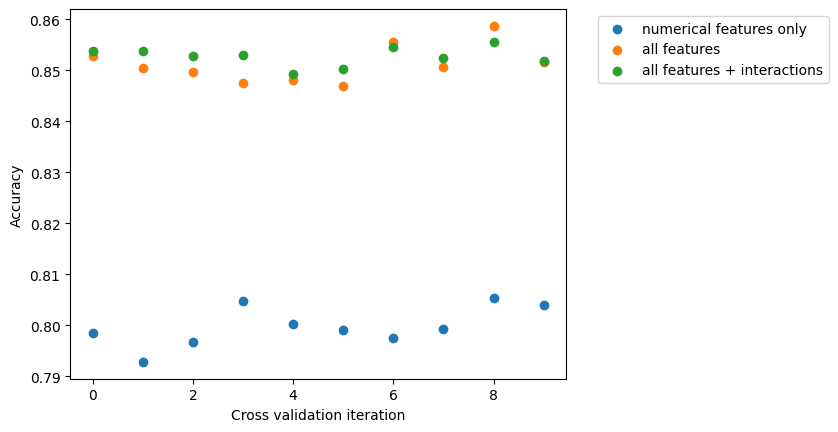

In [49]:
# Write your code here.
plt.scatter(
    indices, test_score_lr, label = "numerical features only"
)

plt.scatter(
    indices, test_score_complex_lr, label = "all features"
)
plt.scatter(
    indices, test_score_with_interaction, label = "all features + interactions"
)

plt.xlabel("Cross validation iteration")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

print(
    "A model using multiplicative interactions is better than a"
    " model using all features for"
    f" {sum(test_score_with_interaction > test_score_complex_lr)} CV iterations out of 10."
)

When you multiply two one-hot encoded categorical features, the resulting interaction feature is mostly 0, with a 1 only when both original features are active, acting as a logical `AND`. In this case it could mean we are creating new rules such as “has a given education `AND` a given native country”, which we expect to be predictive. This new rules map the original feature space into a higher dimension space, where the linear model can separate the data more easily.

Keep into account that multiplying all pairs of one-hot encoded features may lead to a rapid increase in the number of features, especially if the original categorical variables have many levels. This can increase the computational cost of your model and promote overfitting, as we will see in a future notebook.